1. загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1).

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('logistic.csv', names=["class", "x", "y"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   205 non-null    int64  
 1   x       205 non-null    float64
 2   y       205 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


,class,x,y
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


2. Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [ ]:
df.value_counts("class")

,count
class,
1,105
-1,100


3. Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами).

Text(0, 0.5, 'y')

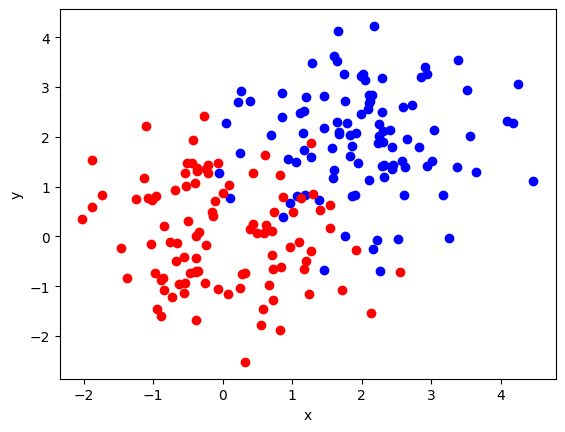

In [ ]:
import matplotlib.pyplot as plt

df = df.drop(df[(df.x < -5) | (df.x > 5) | (df.y < -5) | (df.y > 5)].index)

dfp1 = df[df["class"] == 1]
dfs1 = df[df["class"] == -1]
plt.scatter(dfp1.x, dfp1.y, color="blue")
plt.scatter(dfs1.x, dfs1.y, color="red")
plt.xlabel("x")
plt.ylabel("y")

4. Разделите данные на признаки и ответы.

In [ ]:
dfclass = df["class"]
dfattrs = df.loc[:, df.columns != "class"]

5. Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения используйте всю выборку.

In [ ]:
from sklearn.linear_model import LogisticRegression

# возьмем параметры по умолчанию:
# penalty='l2' - регуляризация l2,
# tol=0.0001 - точность остановки,
# C=1.0 - параметр регуляризации (1/λ), меньше -> сильнее,
# random_state=None - перемешивание данных,
# max_iter=100 - максимум шагов.
lr = LogisticRegression()
lr.fit(dfattrs, dfclass)

LogisticRegression()

6. Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.

Text(0, 0.5, 'y')

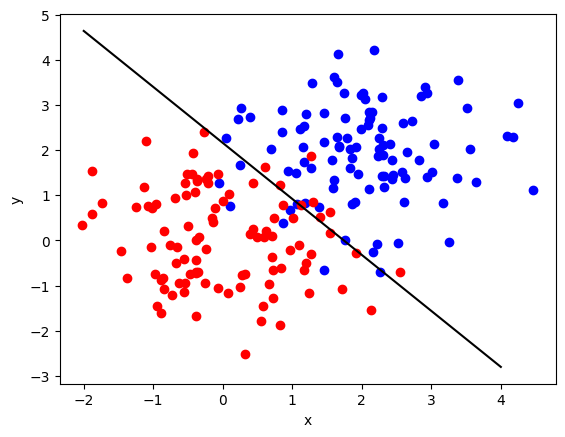

In [ ]:
import numpy as np

def lr_line(x):
    return (-(x * lr.coef_[0][0]) - lr.intercept_) / lr.coef_[0][1]

x = np.linspace(-2, 4)
plt.plot(x, lr_line(x), color="k")
plt.scatter(dfp1.x, dfp1.y, color="blue")
plt.scatter(dfs1.x, dfs1.y, color="red")
plt.xlabel("x")
plt.ylabel("y")

7. получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

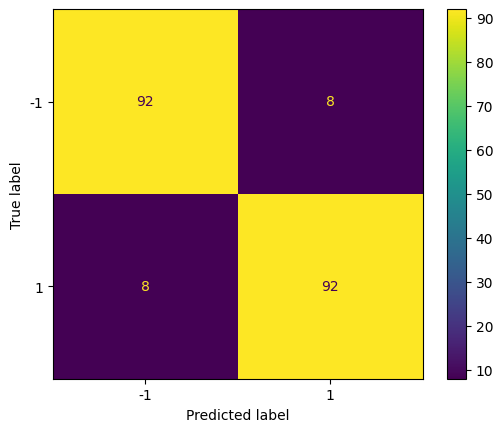

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, dfattrs, dfclass)
# здесь в желтых клетках количество правильно предсказанных моделью объектов,
# в фиолетовых - неправильно предсказанные.
# TN FP
# FN TP

8. Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(classification_report(dfclass, lr.predict(dfattrs)))
# доля правильных ответов: accuracy: 92% всех объектов определено правильно,
# точность: precision: 92% правильно определенных из предсказанных,
# полнота: recall: 92% правильно определенных из класса,
# f-мера: f1-score: 92% гармоническое среднее точности и полноты,
print("AUC:", round(roc_auc_score(dfclass, lr.predict(dfattrs)), 3))
# AUC: площадь под характеристической кривой: 1 - лучше, 0 - хуже.

              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

AUC: 0.92


9. В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу.

Text(0, 0.5, 'y')

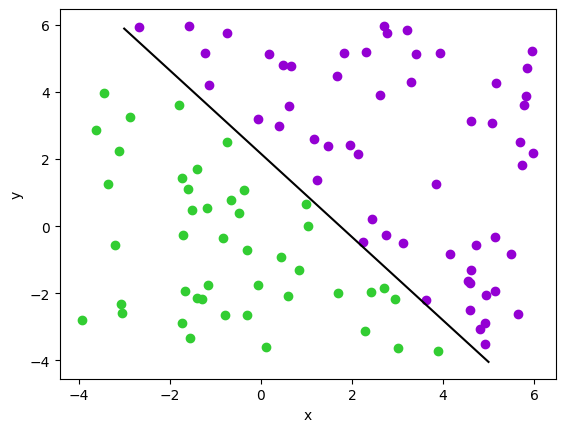

In [ ]:
import numpy as np

df2attrs = np.random.rand(100, 2) * 10 - 4

x = np.linspace(-3, 5)
plt.plot(x, lr_line(x), color="k")

df2p1 = df2attrs[[i == 1 for i in lr.predict(df2attrs)]]
df2s1 = df2attrs[[i == -1 for i in lr.predict(df2attrs)]]

plt.scatter(df2p1.T[0], df2p1.T[1], color="darkviolet")
plt.scatter(df2s1.T[0], df2s1.T[1], color="limegreen")
plt.xlabel("x")
plt.ylabel("y")